In [1]:
%matplotlib inline


In [2]:
import matplotlib as ml
from scipy.stats import poisson
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import gamma


# Creating a bayesian model

There are four main steps to creating a bayesian model.

1. Create a model that makes the *most sense* for how the data might have been created
2. Create a prior, e.g. define the parameters of the model in terms of a distribution
3. Use observations to construct a likelihood function. 
4. Combine the likelihood and the prior to create a posterior distribution 

## Step 1: Define a model

A poisson distribution seems like a good distribution because it represents discrete data. The poisson distribution takes a parameter λ. The probability of getting a specific data point can be represented by fixing λ.

* Poisson distribution: $$ P\left( x \mid λ \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}} $$ 


A really nice property of the poisson distribution is that λ represents the mean. Let's say that we think we'll the mean of the distribution will be 4. Plugging this value in for λ gives the following pmf.

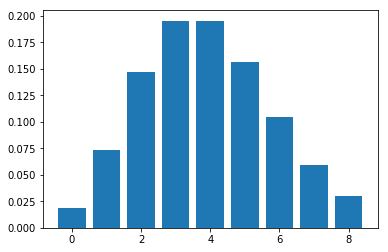

In [3]:
µ = 4
x = np.arange(poisson.ppf(0.01, µ), poisson.ppf(0.99, µ))
y = poisson.pmf(x, µ)
prior_hist = plot.hist(x, np.arange(0,10), weights=y,align="left", rwidth=0.8)

## Step 2: Define a prior

The next step is to define the hyperparameter of our model λ, as a distribution. 

A model mean, µ = 4 is our best guests at the mean, but we're really not very confident in our estimate. We want to reflect that in the prior. We'll choose a gamma distribution to represent out mean, why I'm choosing a gamma distribution will become apparent shortly! We want to reflect our prior belief that the actual mean is *around* 4, so we choose parameters for the gamma distribution, shape(𝑘) and scale(𝜃), such that the mean of our gamma distribution is 4. Let's take a look at two options for 𝑘 and 𝜃, both giving a mean of 4.

* Gamma distribution: $$P\left(λ \right) =  \frac{ 1 } {\Gamma \left( 𝑘 \right) 𝜃^𝑘}λ^{𝑘 -1}𝑒^{-{\frac {λ}{𝜃}}} $$

Where 𝚪 is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function)

[Mean of a gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution): µ = 𝑘 * 𝜃

### Confident Prior

If we are really confident in our prior, we can choose 𝑘 = 80 and 𝜃 = 0.05, which narrows the width of our distribution

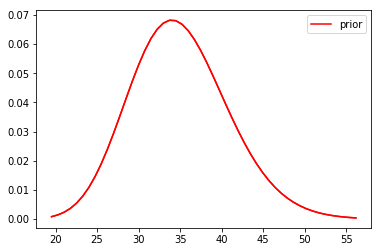

In [8]:
confident_prior_shape = 35
confident_prior_scale = 1

confident_prior_x = np.linspace(gamma.ppf(0.001, confident_prior_shape, loc=0, scale=confident_prior_scale), gamma.ppf(0.999, confident_prior_shape, loc=0, scale=confident_prior_scale))
confident_prior_y = gamma.pdf(confident_prior_x, confident_prior_shape, loc=0, scale=confident_prior_scale)

fig, ax = plot.subplots(1, 1)
confident_prior, = ax.plot(confident_prior_x, confident_prior_y, 'r-', label="prior")

ax.plot(confident_prior_x, confident_prior_y, 'r-',label='gamma pdf')
ax.legend(handles=[confident_prior])



### Uncertain Prior

However since we aren't that confident in our prior, we'll choose 𝑘 = 4 and 𝜃 = 1, which has a wider distribution. Plugging these values into gamma gives us our prior function.


$$P\left(λ \right) =  \frac{ 1 } {6}λ^{3}𝑒^{-λ} $$

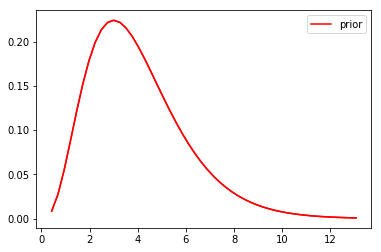

In [51]:
prior_shape = 4
prior_scale = 1
prior_x = np.linspace(gamma.ppf(0.001, prior_shape, loc=0, scale=prior_scale), gamma.ppf(0.999, prior_shape, loc=0, scale=prior_scale))
prior_y = gamma.pdf(prior_x, prior_shape, loc=0, scale=prior_scale)

fig, ax = plot.subplots(1, 1)
prior, = ax.plot(prior_x, prior_y, 'r-', label="prior")

ax.plot(prior_x, prior_y, 'r-',label='gamma pdf')
ax.legend(handles=[prior])

There were a lot of choices we could make for 𝑘 and 𝜃 that make a mean of 4. We choose values here to reflect our prior beliefs and confidence levels in those beliefs. If we have strong beliefs about *how* the parameters, 𝑘 and 𝜃, of the prior are distributed, we could continue one level further up and make distributions of the two variables 𝑘 and 𝜃. This type of modeling is known as [hierarchical bayes](https://en.wikipedia.org/wiki/Bayesian_hierarchical_modeling)

## Step 3: Construct a likelihood function

Our likelihood function for a specific observation is $$ P(x_1 \mid λ)$$ for different values of lambda. To get the likelihood of _all_ of our observations, we multiply the individual likelihoods together:


$$ P(x_1, x_2 ... x_n\mid λ) = \prod\limits_{i=1}^N p(x_i \mid  λ) $$



## Step 4: Calculate the posterior

Now let's use bayes theorem to calculate our posterior.

$$ P(λ \mid X) = \frac{ P(λ)\, P(X \mid λ) }{P(X)} $$

P(X) is a constant because the values of X are fixed to our observations. The equation reads probability of λ _given our observations_, X. We can ditch the P(X) denominor term temporarily just so long as we rescale the distribution at the end. We can now say that the left hand side is _proportional to_ the right hand side

$$ P(λ \mid X) ∝ P(λ)  P(X \mid λ)  $$

Plugging in our equations, we get a posterior distribution for λ:

$$ P(λ \mid X) ∝ \frac{ 1 }{6}\,λ^{3}𝑒^{-λ} \prod\limits_{i=1}^X \frac{{e^{ - \lambda } \lambda ^{x_i} }}{{x_i!}} $$

For the sake of simplicity, let's say we observe 1 customer who picks 6 apples. This equation simplifies to: 

$$ P(λ \mid X) ∝ \frac{ 1 }{6}\,λ^{3}𝑒^{-λ} \frac{{e^{ - \lambda } \lambda^6 }}{720} $$

ensure we re-scale the distribution by some constant (C) so that it integrates to 1:

$$ P(λ \mid X) = C \,λ^{3}𝑒^{-λ} {e^{ - \lambda } \lambda^6 } $$

and combine terms to get the posterior distribution:

$$ P(λ \mid X) = C λ^9𝑒^{-2\lambda} $$


## Conjugate priors

We've computed our posterior for λ, but even more incredibly, we've landed back on a Gamma distribution! Let's see exactly how this is the case. Remember the gamma distribution is defined as:


$$P\left(λ \right) =  \frac{ 1 } {\Gamma \left( 𝑘 \right) 𝜃^𝑘}λ^{𝑘 -1}𝑒^{-{\frac {λ}{𝜃}}} $$

and at the beginning, we somewhat arbirarily chose values for 𝑘 and 𝜃 because it caused the mean to be 4. Now, notice that a choice of 𝑘 = 10 and 𝜃 = 0.5 gives us our posterior!

$$P\left(λ \right) =  \frac{ 1 } {\Gamma \left( 10 \right) 0.5^{10}}λ^9𝑒^{-{2{λ}}} $$

which just means that in our calculation of the posterior we choose C:

$$ C =  \frac{ 1 } {\Gamma \left( 10 \right) 0.5^{10}} $$

Now this wasn't an accident, in fact it's precisely the reason that I chose a gamma distribution as the prior. A poissoin distribution's conjugate prior is the Gamma distribution, and whenever you choose a conjugate prior, the posterior will always be of the same form as the prior

If we step back for a moment we can see that by using a conjugate prior, we generate our posterior by **updating the parameters of our prior** — reflecting a new mean and confidence level, depending on the amount of observed data. As we observe more datapoints, 𝑘 and 𝜃 are updated in such a way as to shrink the width of our posterior, indicating an increased level of confident in our distribution.

Plotting our new posterior distribution:

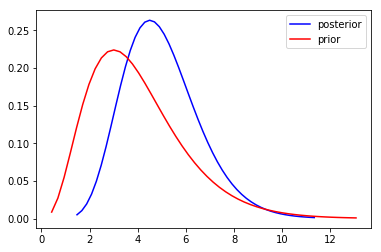

In [52]:
posterior_shape = 10
posterior_scale = 0.5
posterior_x = np.linspace(gamma.ppf(0.001, posterior_shape, loc=0, scale=posterior_scale), gamma.ppf(0.999, posterior_shape, loc=0, scale=posterior_scale))
posterior_y = gamma.pdf(x1, posterior_shape, loc=0, scale=posterior_scale)

fig, ax = plot.subplots(1, 1)
posterior, = ax.plot(posterior_x, posterior_y, 'b-', label="posterior") 
prior, = ax.plot(prior_x, prior_y, 'r-', label="prior")
ax.legend(handles=[posterior, prior])